# DoF Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test_utils import SwissRoll, run_tsne#, plot_tsne_result
from plot_utils import plot_tsne_result

from openTSNE import TSNE
import matplotlib.pyplot as plt

2025-10-29 21:18:27.707238: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Set up some shared parameters

In [ ]:
perplexity = 20
random_state = 42
n_jobs = 1
initial_alpha = 1
n_iter = 1000
n_components = 2
dof_lr = 0.5

## Load a SwissRoll with 1000 datapoints

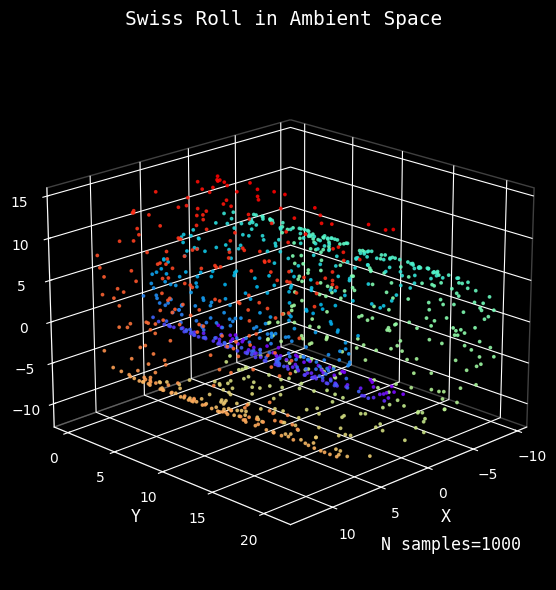

In [5]:
swiss_roll_1k = SwissRoll.generate(n_samples=1000, noise=0.0)
swiss_roll_1k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [8]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4450, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1267 sec
Iteration  100, KL divergence 2.4839, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1537 sec
Iteration  150, KL divergence 2.4185, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.3750 sec
Iteration  200, KL divergence 2.3609, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1467 sec
Iteration  250, KL divergence 2.3620, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0820 sec
   --> Time elapsed: 5.88 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.2882, DoF 2.9473, DoF gradient -0.0070, 50 iterations in 1.7727 sec
Iteration  100, KL divergence 0.2810, DoF 3.2437, DoF gradient -0.0050, 50 iterations in 1.9301

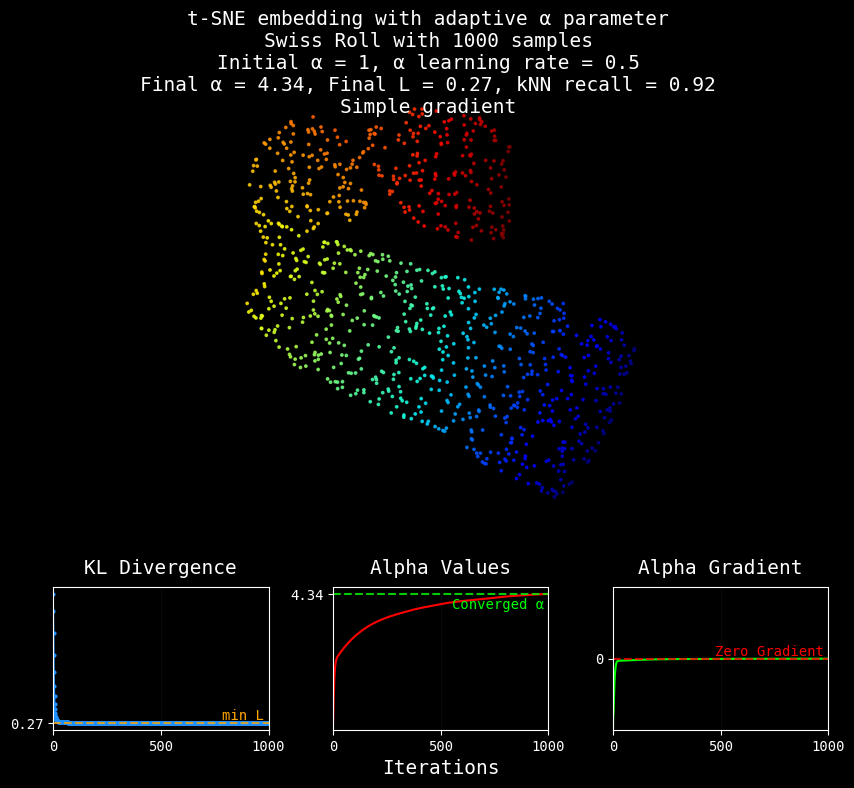

In [9]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "Simple gradient", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [10]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4450, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1803 sec
Iteration  100, KL divergence 2.4839, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1965 sec
Iteration  150, KL divergence 2.4185, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1819 sec
Iteration  200, KL divergence 2.3609, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1026 sec
Iteration  250, KL divergence 2.3620, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0589 sec
   --> Time elapsed: 5.72 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.2797, DoF 5.6134, DoF gradient -0.1256, 50 iterations in 1.8750 sec
Iteration  100, KL divergence 0.2746, DoF 4.6959, DoF gradient -0.0072, 50 iterations in 1.8001

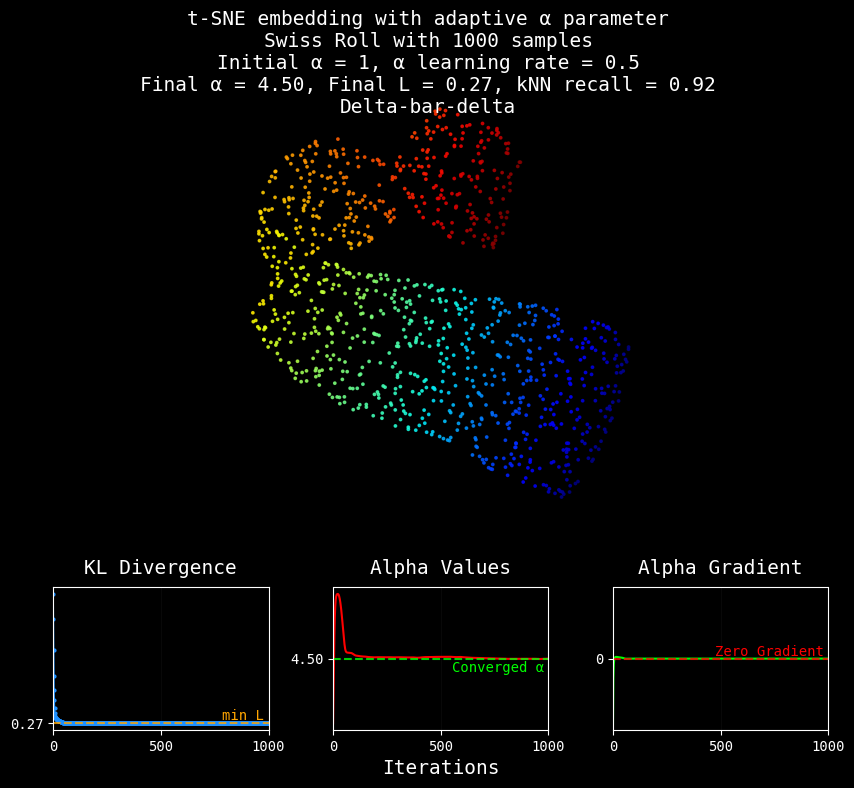

In [12]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "Delta-bar-delta", black_template = True)

### Run t-SNE withouy DoF learning (fixed to 1 by default)

In [14]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof=1,
    negative_gradient_method="bh",
    dataset_name="Swiss Roll",
    )   

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4450, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1449 sec
Iteration  100, KL divergence 2.4839, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.2177 sec
Iteration  150, KL divergence 2.4185, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.2422 sec
Iteration  200, KL divergence 2.3609, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1332 sec
Iteration  250, KL divergence 2.3620, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0524 sec
   --> Time elapsed: 5.79 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.6738, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1400 sec
Iteration  100, KL divergence 0.6408, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1116 s

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


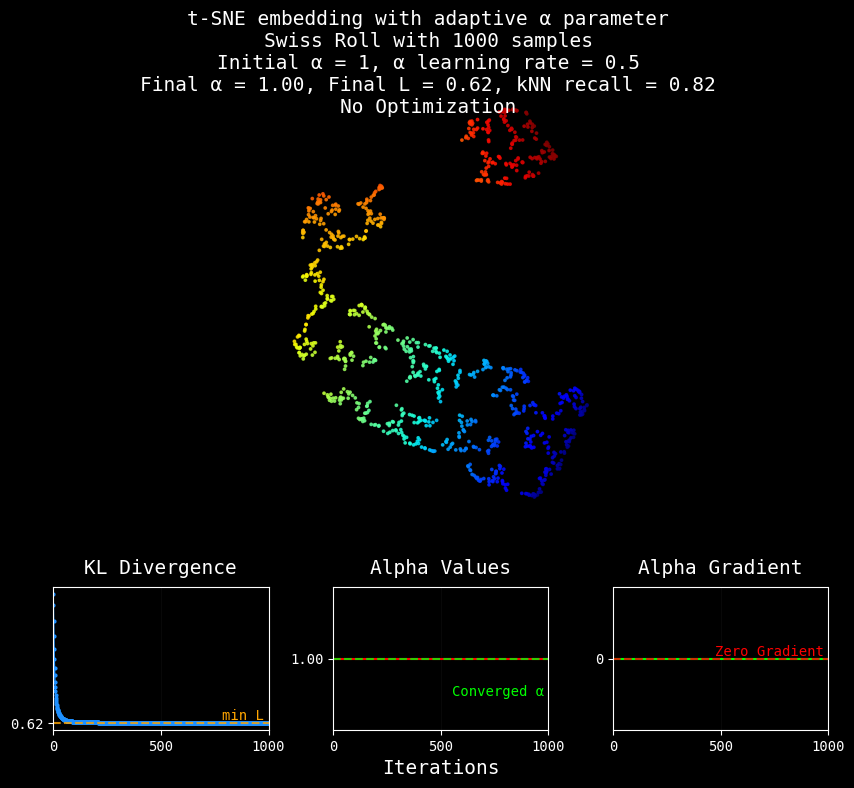

In [15]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "No Optimization", black_template = True)

## Load a SwissRoll with 5000 datapoints

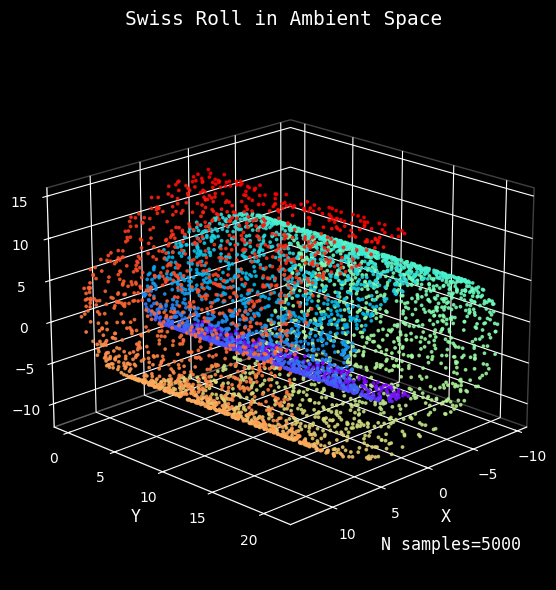

In [16]:
swiss_roll_5k = SwissRoll.generate(n_samples=5000, noise=0.0)
swiss_roll_5k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [ ]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.1998, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3977 sec
Iteration  100, KL divergence 3.1311, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3392 sec
Iteration  150, KL divergence 3.0330, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4239 sec
Iteration  200, KL divergence 2.9596, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.8248 sec
Iteration  250, KL divergence 2.9175, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.6211 sec
   --> Time elapsed: 37.61 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 0.3298, DoF 3.9109, DoF gradient -0.0113, 50 iterations in 11.4899 sec
Iteration  100, KL divergence 0.3048, DoF 4.2507, DoF gradient -0.0041, 50 iterations in 11

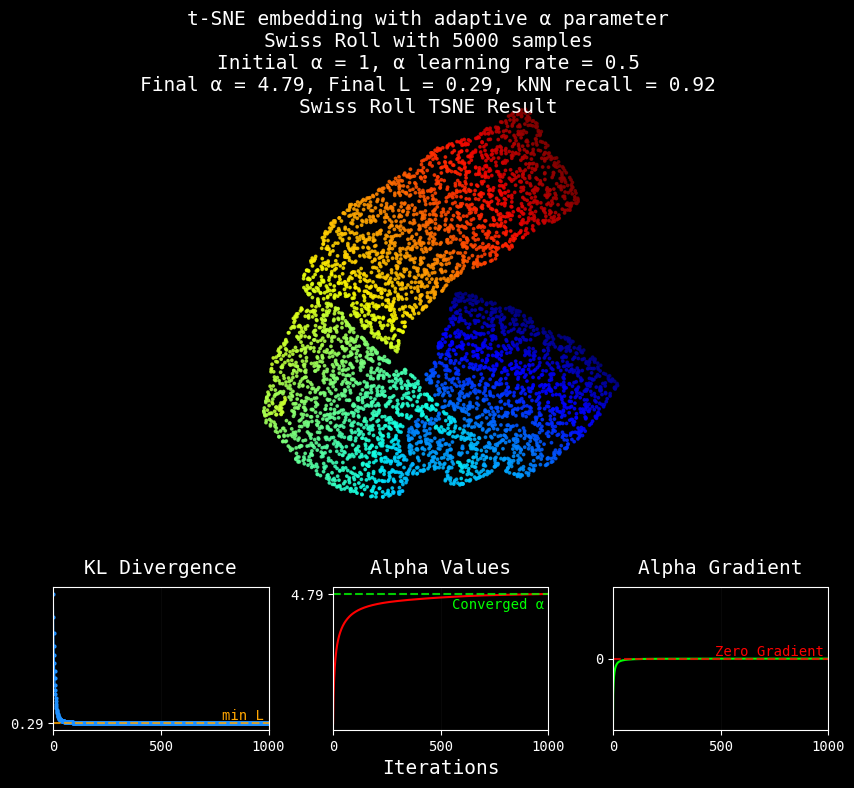

In [19]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [20]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.1998, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4596 sec
Iteration  100, KL divergence 3.1311, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4010 sec
Iteration  150, KL divergence 3.0330, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.5349 sec
Iteration  200, KL divergence 2.9596, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3081 sec
Iteration  250, KL divergence 2.9175, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.2838 sec
   --> Time elapsed: 36.99 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 0.3307, DoF 12.6947, DoF gradient 0.0138, 50 iterations in 11.3937 sec
Iteration  100, KL divergence 0.3201, DoF 12.5292, DoF gradient -0.0160, 50 iterations in 1

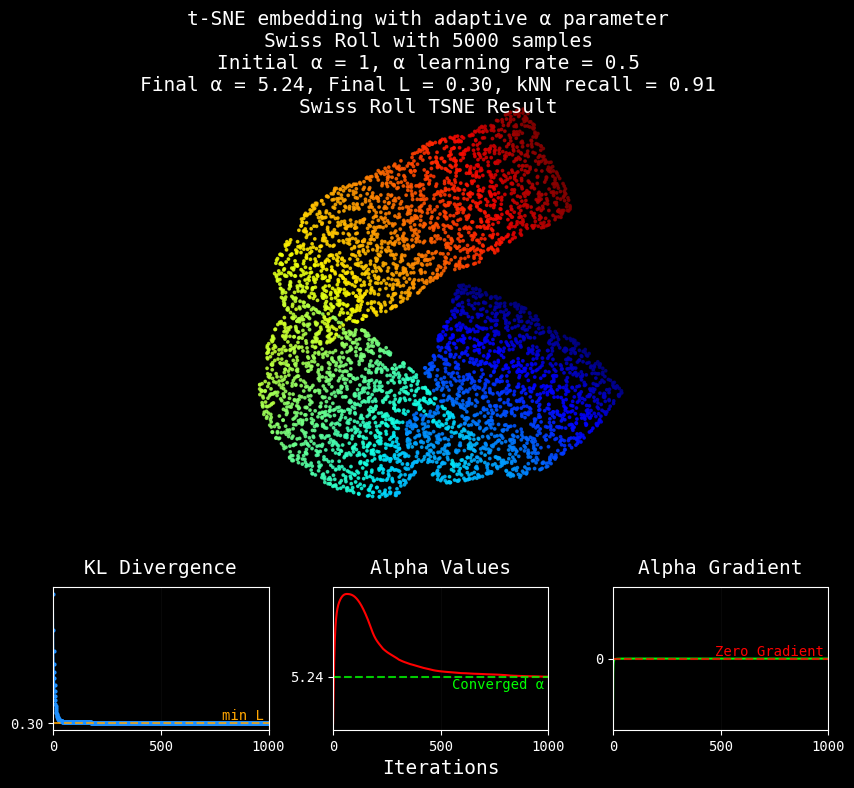

In [21]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE without DoF learning (set to 1 by default)

In [22]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    dof=1,
    negative_gradient_method="bh",
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.1998, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3232 sec
Iteration  100, KL divergence 3.1311, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4424 sec
Iteration  150, KL divergence 3.0330, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.8505 sec
Iteration  200, KL divergence 2.9596, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.0915 sec
Iteration  250, KL divergence 2.9175, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.1275 sec
   --> Time elapsed: 36.84 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 1.1278, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4646 sec
Iteration  100, KL divergence 0.9417, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.975

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


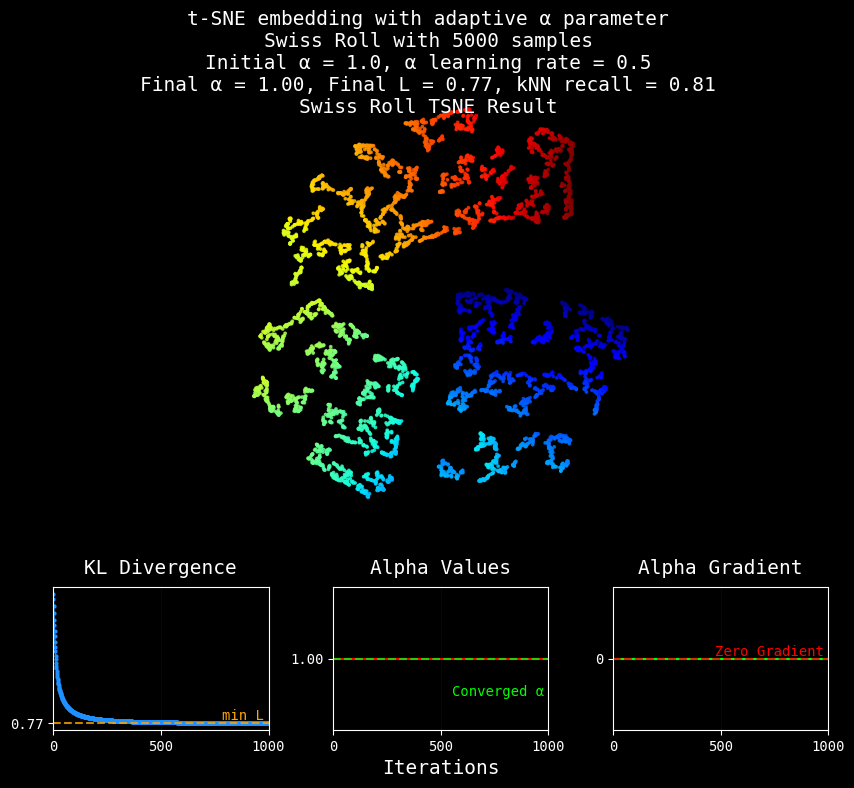

In [23]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

## Load a SwissRoll with 10,000 datapoints

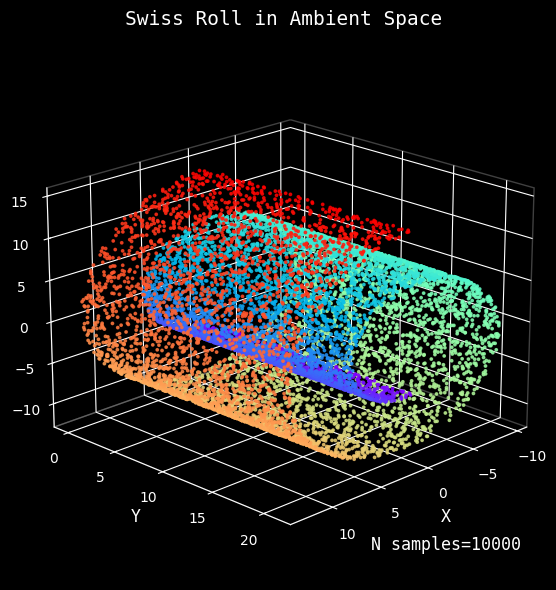

In [24]:
swiss_roll_10k = SwissRoll.generate(n_samples=10000, noise=0.0)
swiss_roll_10k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [26]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 20.0665 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 18.7973 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7324 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.3951 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.1504 sec
   --> Time elapsed: 91.14 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 0.4183, DoF 4.2491, DoF gradient -0.0158, 50 iterations in 29.4798 sec
Iteration  100, KL divergence 0.3334, DoF 4.7053, DoF gradient -0.0053, 50 iterations

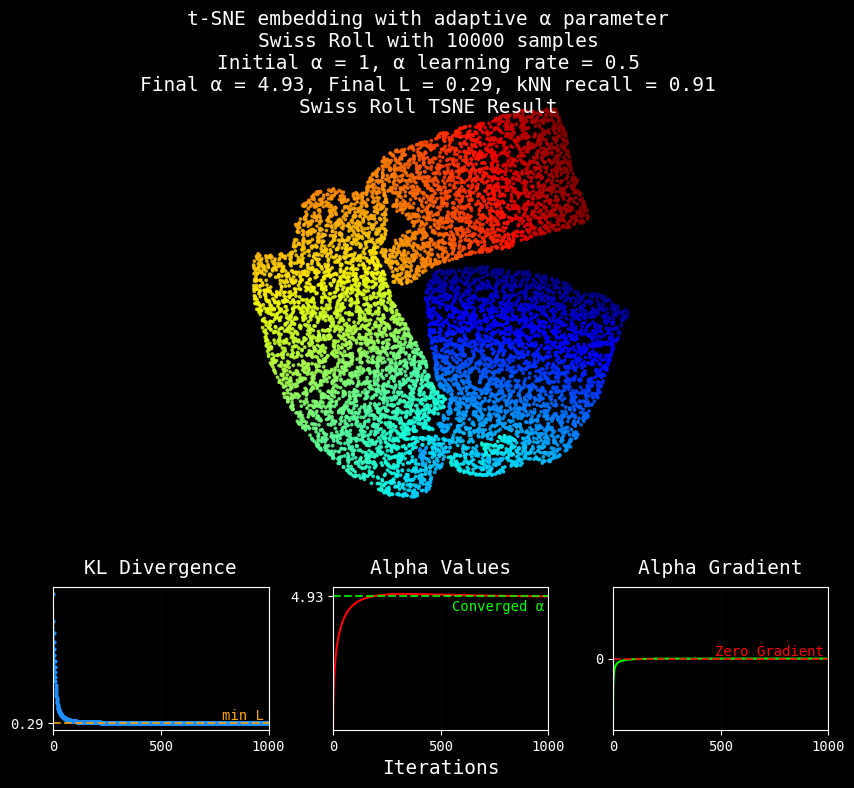

In [27]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [28]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.8767 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 18.6906 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.6261 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.5085 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.5819 sec
   --> Time elapsed: 87.28 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 0.4057, DoF 15.2346, DoF gradient 0.0662, 50 iterations in 26.3439 sec
Iteration  100, KL divergence 0.3470, DoF 16.8309, DoF gradient 0.0024, 50 iterations

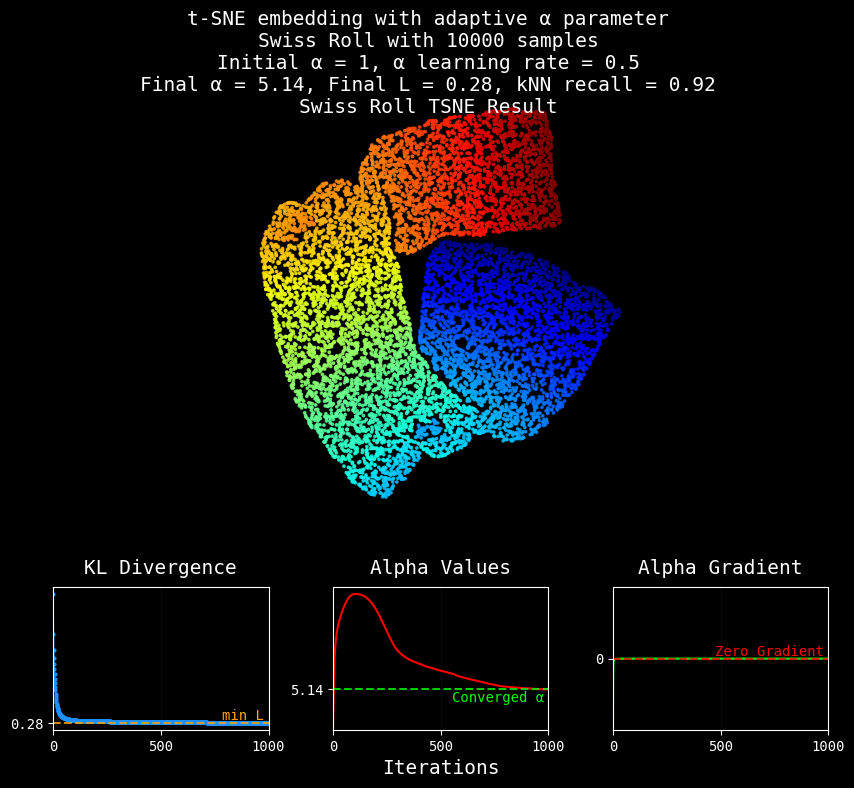

In [29]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE without DoF learning (set to 1 by default)

In [30]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof=1,
    negative_gradient_method="bh",

    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.8920 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.3787 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7028 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.4675 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.2922 sec
   --> Time elapsed: 86.73 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 1.4940, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7309 sec
Iteration  100, KL divergence 1.2077, DoF 1.0000, DoF gradient 0.0000, 50 iterations i

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


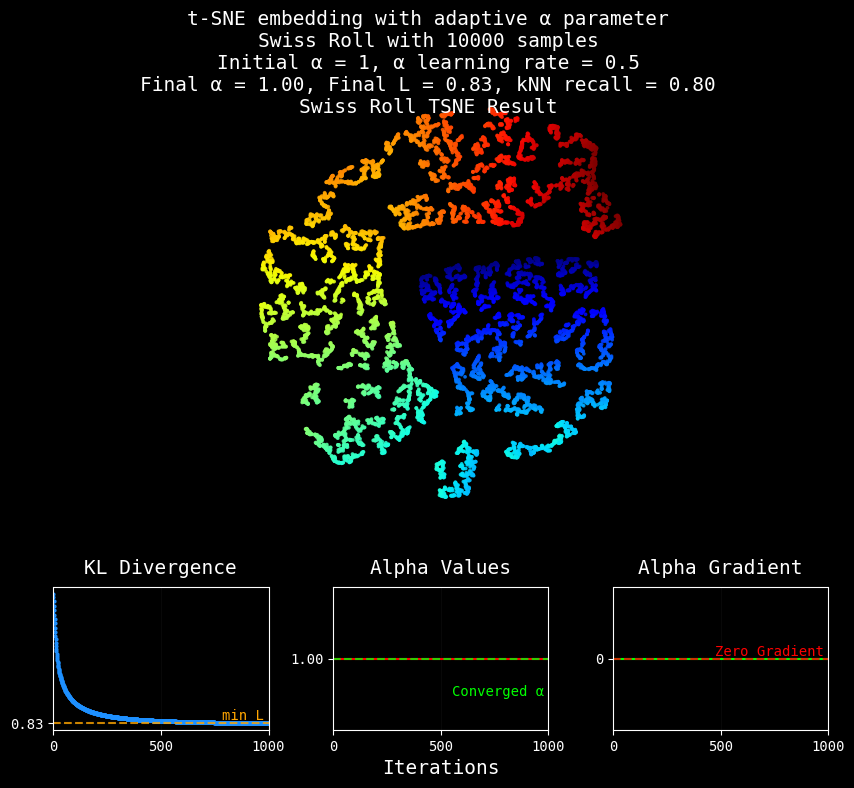

In [31]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template=True)